In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as sb

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
data=pd.read_csv('C:/Users/lamup/Downloads/calories.csv')

In [4]:
data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
data2=pd.read_csv('C:/Users/lamup/Downloads/exercise.csv')

In [7]:
data2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
df=pd.merge(data,data2,on='User_ID')

In [9]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [11]:
df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [13]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [14]:
df=df.drop(['User_ID'],axis=1)

In [15]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Heart_Rate'}>],
       [<AxesSubplot:title={'center':'Body_Temp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

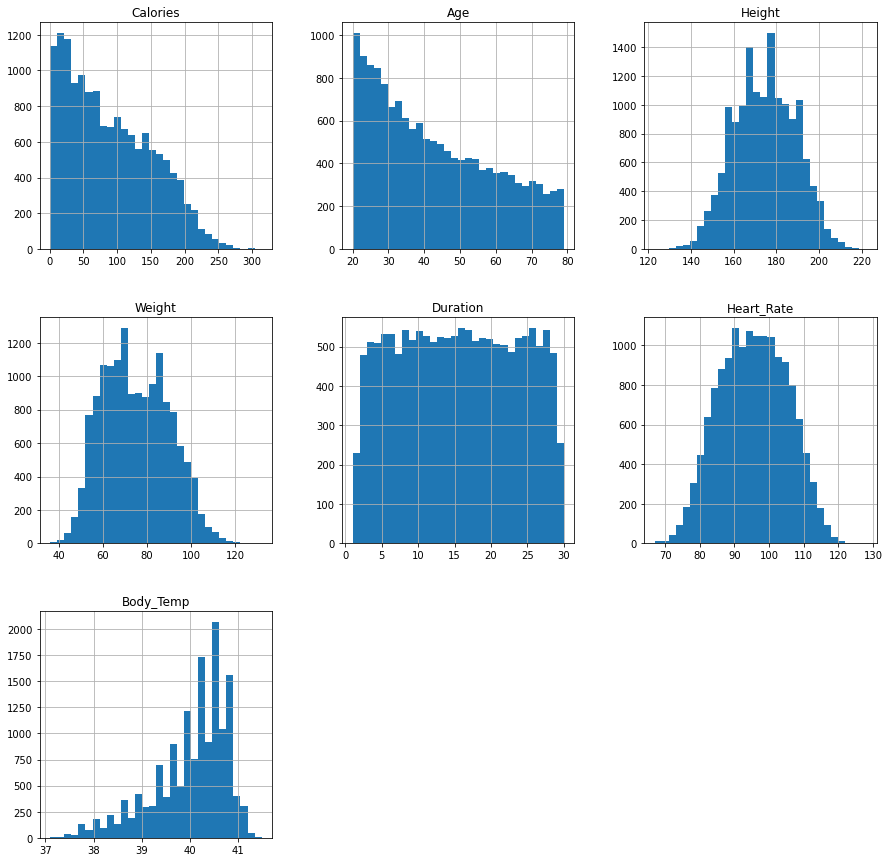

In [19]:
df.hist(figsize=(15,15),bins=30)

<AxesSubplot:xlabel='Gender', ylabel='count'>

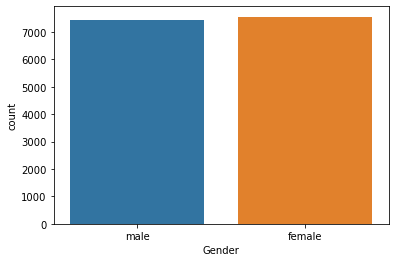

In [22]:
sb.countplot('Gender',data=df)

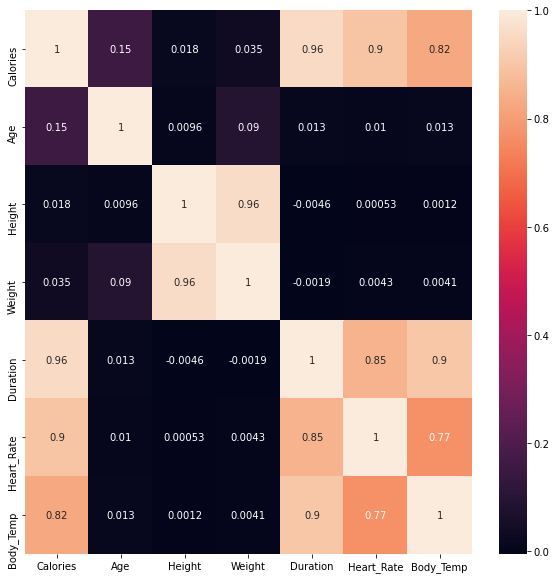

In [26]:
mt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)
mt.show()

In [29]:
a=pd.get_dummies(df['Gender'],drop_first=True)

In [31]:
df=df.drop(['Gender'],axis=1)

In [33]:
df=pd.concat([df,a],axis=1)
df.head()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male,male
0,231.0,68,190.0,94.0,29.0,105.0,40.8,1,1
1,66.0,20,166.0,60.0,14.0,94.0,40.3,0,0
2,26.0,69,179.0,79.0,5.0,88.0,38.7,1,1
3,71.0,34,179.0,71.0,13.0,100.0,40.5,0,0
4,35.0,27,154.0,58.0,10.0,81.0,39.8,0,0


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x=df.drop(['Calories'],axis=1)
y=df['Calories']

In [43]:
x.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male,male
0,68,190.0,94.0,29.0,105.0,40.8,1,1
1,20,166.0,60.0,14.0,94.0,40.3,0,0
2,69,179.0,79.0,5.0,88.0,38.7,1,1
3,34,179.0,71.0,13.0,100.0,40.5,0,0
4,27,154.0,58.0,10.0,81.0,39.8,0,0


In [44]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [45]:
xtrn,xtst,ytrn,ytst=train_test_split(x, y, test_size=0.33, random_state=42)

In [46]:
xtrn.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male,male
655,41,186.0,87.0,14.0,100.0,40.3,1,1
12044,20,162.0,59.0,18.0,95.0,40.6,0,0
14844,52,159.0,62.0,23.0,99.0,40.4,0,0
13985,31,171.0,70.0,5.0,83.0,39.0,0,0
7974,52,182.0,86.0,28.0,104.0,40.3,1,1


In [47]:
xtrn=sc.fit_transform(xtrn)

In [48]:
xtst = sc.transform(xtst)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(xtrn,ytrn)

LinearRegression()

In [52]:
lr.intercept_

88.92606965174122

In [55]:
lr.coef_

array([  8.454178  ,  -2.55851331,   4.46835811,  55.08100374,
        19.04838933, -13.25305251,  -0.34431644,  -0.34431644])

In [56]:
from sklearn.metrics import r2_score

In [58]:
ytrn_pred=lr.predict(xtrn)

In [59]:
b=pd.DataFrame({"actual":ytrn,'predict':ytrn_pred})
b.head()

,actual,predict
655,81.0,83.552072
12044,87.0,81.845996
14844,133.0,143.727756
13985,18.0,6.131271
7974,193.0,190.121164


In [60]:
r2_score(ytrn,ytrn_pred)

0.9676004204744925

In [61]:
lr.score(xtst,ytst)

0.9663701348612176